In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def bilinear_interpolation(image, new_width, new_height):
    old_width, old_height = image.size
    new_image = Image.new("RGB", (new_width, new_height))
    
    for y in range(new_height):
        for x in range(new_width):
            src_x = x * (old_width - 1) / (new_width - 1)
            src_y = y * (old_height - 1) / (new_height - 1)
            
            x0, y0 = int(src_x), int(src_y)
            x1, y1 = min(x0 + 1, old_width - 1), min(y0 + 1, old_height - 1)
            
            weight_x1 = src_x - x0
            weight_x0 = 1 - weight_x1
            weight_y1 = src_y - y0
            weight_y0 = 1 - weight_y1
            
            pixel00 = image.getpixel((x0, y0))
            pixel01 = image.getpixel((x0, y1))
            pixel10 = image.getpixel((x1, y0))
            pixel11 = image.getpixel((x1, y1))
            
            r = int(weight_x0 * weight_y0 * pixel00[0] + weight_x0 * weight_y1 * pixel01[0] +
                    weight_x1 * weight_y0 * pixel10[0] + weight_x1 * weight_y1 * pixel11[0])
            g = int(weight_x0 * weight_y0 * pixel00[1] + weight_x0 * weight_y1 * pixel01[1] +
                    weight_x1 * weight_y0 * pixel10[1] + weight_x1 * weight_y1 * pixel11[1])
            b = int(weight_x0 * weight_y0 * pixel00[2] + weight_x0 * weight_y1 * pixel01[2] +
                    weight_x1 * weight_y0 * pixel10[2] + weight_x1 * weight_y1 * pixel11[2])
            
            new_image.putpixel((x, y), (r, g, b))
    
    return new_image

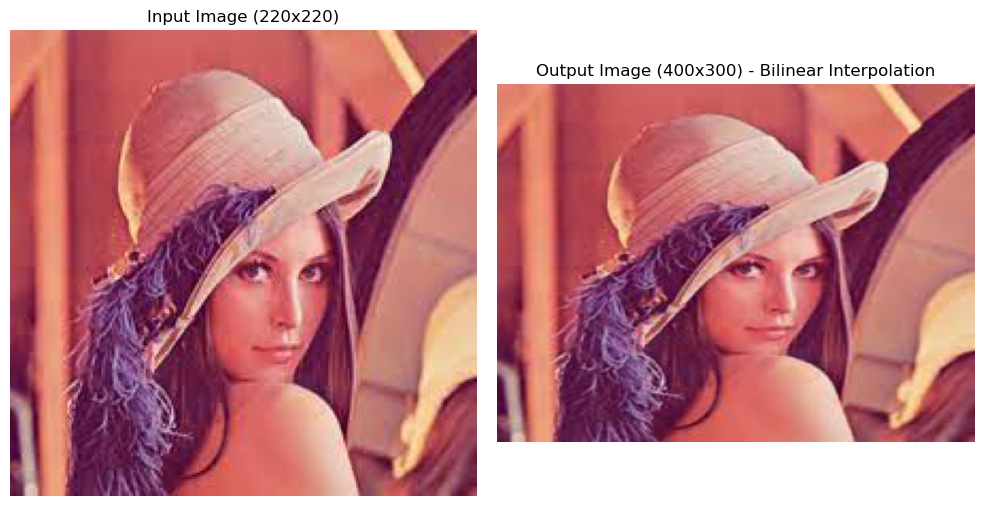

In [10]:
# Load an image
input_image = Image.open("Lena.jpg")

# Define new dimensions for resizing
new_width = 400
new_height = 300

# Perform bilinear interpolation
output_image = bilinear_interpolation(input_image, new_width, new_height)

# Save the resized image
output_image.save("output_image_bilinear.jpg")

# Plot the input and output images
plt.figure(figsize=(10, 5))

# Input image
plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title("Input Image ({}x{})".format(input_image.width, input_image.height))
plt.axis("off")

# Output image
plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title("Output Image ({}x{}) - Bilinear Interpolation".format(new_width, new_height))
plt.axis("off")

plt.tight_layout()
plt.show()
